# Import Libraries

In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-movies-dataset/imdb_movies.csv


# Exploratory Data Analysis

In [5]:
df = pd.read_csv("/kaggle/input/imdb-movies-dataset/imdb_movies.csv")
print("Number of movies is: ", df.shape[0])
df.head()

Number of movies is:  10178


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10052 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10052 non-null  object 
 1   date_x      10052 non-null  object 
 2   score       10052 non-null  float64
 3   genre       10052 non-null  object 
 4   overview    10052 non-null  object 
 5   crew        10052 non-null  object 
 6   orig_title  10052 non-null  object 
 7   status      10052 non-null  object 
 8   orig_lang   10052 non-null  object 
 9   budget_x    10052 non-null  float64
 10  revenue     10052 non-null  float64
 11  country     10052 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1020.9+ KB


In [27]:
df.dropna(inplace=True)

In [29]:
df.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [42]:
df.country.unique()

array(['AU', 'US', 'MX', 'GB', 'CL', 'NO', 'ES', 'AR', 'KR', 'HK', 'UA',
       'IT', 'RU', 'CO', 'DE', 'JP', 'FR', 'FI', 'IS', 'ID', 'BR', 'BE',
       'DK', 'TR', 'TH', 'PL', 'GT', 'CN', 'CZ', 'PH', 'ZA', 'CA', 'NL',
       'TW', 'PR', 'IN', 'IE', 'SG', 'PE', 'CH', 'SE', 'IL', 'DO', 'VN',
       'GR', 'SU', 'HU', 'BO', 'SK', 'UY', 'AT', 'PY', 'MY', 'MU', 'XC',
       'PT', 'IR'], dtype=object)

In [30]:
df.describe().T.style.format('{:,.2f}')

,count,mean,std,min,25%,50%,75%,max
score,"10,052.00",63.83,12.78,0.00,59.00,65.00,71.00,100.00
budget_x,"10,052.00","64,125,276.59","56,658,516.67",1.00,"14,397,627.25","50,000,000.00","104,000,000.00","460,000,000.00"
revenue,"10,052.00","251,204,924.10","276,549,495.18",0.00,"27,687,812.00","149,328,803.80","416,157,754.65","2,923,706,026.00"


<AxesSubplot: >

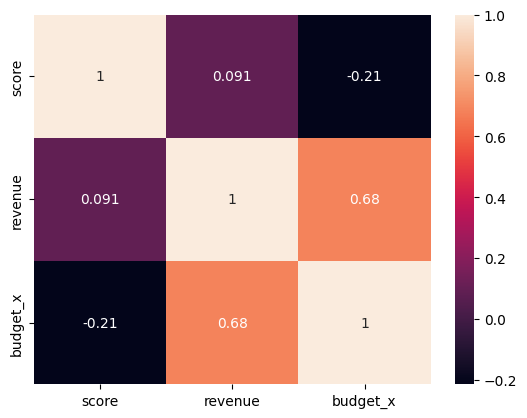

In [34]:
corr = df[["score", "revenue", "budget_x"]].corr()
sns.heatmap(corr, annot=True)

In [31]:
top_10_revenues = df.sort_values("revenue", ascending=True)[-10:]
top_10_revenues

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
2156,BTS: Permission to Dance on Stage - LA,09/08/2022,92.0,"Music, Documentary","Purple colors the city of Los Angeles, as BTS ...","Kim Nam-joon, Self, Kim Seok-jin, Self, Min Yo...",BTS: PERMISSION TO DANCE 온 스테이지 – LA,Released,Korean,215600000.0,1.748017e+09,KR
76,Spider-Man: No Way Home,12/16/2021,80.0,"Action, Adventure, Science Fiction",Peter Parker is unmasked and no longer able to...,"Tom Holland, Peter Parker / Spider-Man, Zenday...",Spider-Man: No Way Home,Released,English,200000000.0,1.910048e+09,AU
104,Avengers: Infinity War,04/25/2018,83.0,"Adventure, Action, Science Fiction",As the Avengers and their allies have continue...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",Avengers: Infinity War,Released,English,300000000.0,2.048360e+09,AU
943,Star Wars: The Force Awakens,12/17/2015,73.0,"Adventure, Action, Science Fiction, Fantasy",Thirty years after defeating the Galactic Empi...,"Harrison Ford, Han Solo, Mark Hamill, Luke Sky...",Star Wars: The Force Awakens,Released,English,245000000.0,2.068224e+09,AU
4483,Louis Tomlinson: All of Those Voices,03/22/2023,91.0,"Documentary, Music",Ditching the typical glossy sheen of celebrity...,"Louis Tomlinson, Self, Oliver Wright, Louis’ P...",Louis Tomlinson: All of Those Voices,Released,English,178800000.0,2.081794e+09,GB
309,Titanic,12/18/1997,79.0,"Drama, Romance",101-year-old Rose DeWitt Bukater tells the sto...,"Leonardo DiCaprio, Jack Dawson, Kate Winslet, ...",Titanic,Released,English,200000000.0,2.222986e+09,AU
6670,Titanic,04/11/1953,66.0,"Drama, Romance","Unhappily married, Julia Sturges decides to go...","Clifton Webb, Richard Ward Sturges, Barbara St...",Titanic,Released,English,200000000.0,2.222986e+09,US
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
230,Avengers: Endgame,04/24/2019,83.0,"Adventure, Science Fiction, Action",After the devastating events of Avengers: Infi...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",Avengers: Endgame,Released,English,400000000.0,2.794732e+09,AU
68,Avatar,12/17/2009,76.0,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar,Released,English,237000000.0,2.923706e+09,AU


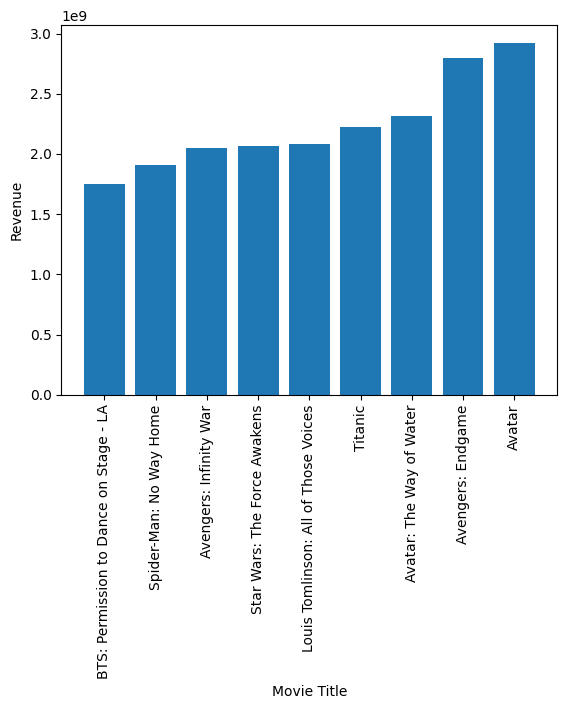

In [39]:
# Create a bar plot
plt.bar(top_10_revenues['names'], top_10_revenues['revenue'])

# Set the x-axis labels
plt.xticks(rotation=90)

# Label the axes
plt.xlabel('Movie Title')
plt.ylabel('Revenue')

# Show the plot
plt.show()

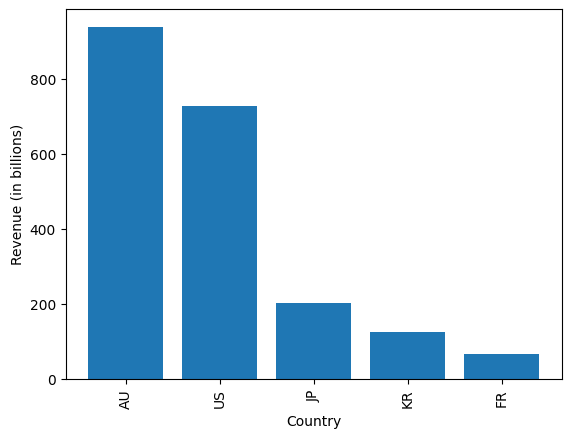

In [46]:
revenue_by_country = df.loc[:, ['country', 'revenue']]
revenue_by_country = revenue_by_country.groupby('country').sum()
top_5_countries = revenue_by_country.nlargest(5, 'revenue')
# Create a bar plot
plt.bar(top_5_countries.index, top_5_countries['revenue']/1000000000)

# Set the x-axis labels
plt.xticks(rotation=90)

# Label the axes
plt.xlabel('Country')
plt.ylabel('Revenue (in billions)')

# Show the plot
plt.show()

In [64]:
df['date_x'] = pd.to_datetime(df['date_x'])
df['year'] = df['date_x'].dt.year
mean_by_year = df.groupby('year')[['revenue', 'budget_x']].mean()

Text(0.5, 1.0, 'Revenue over Years (1903-2023)')

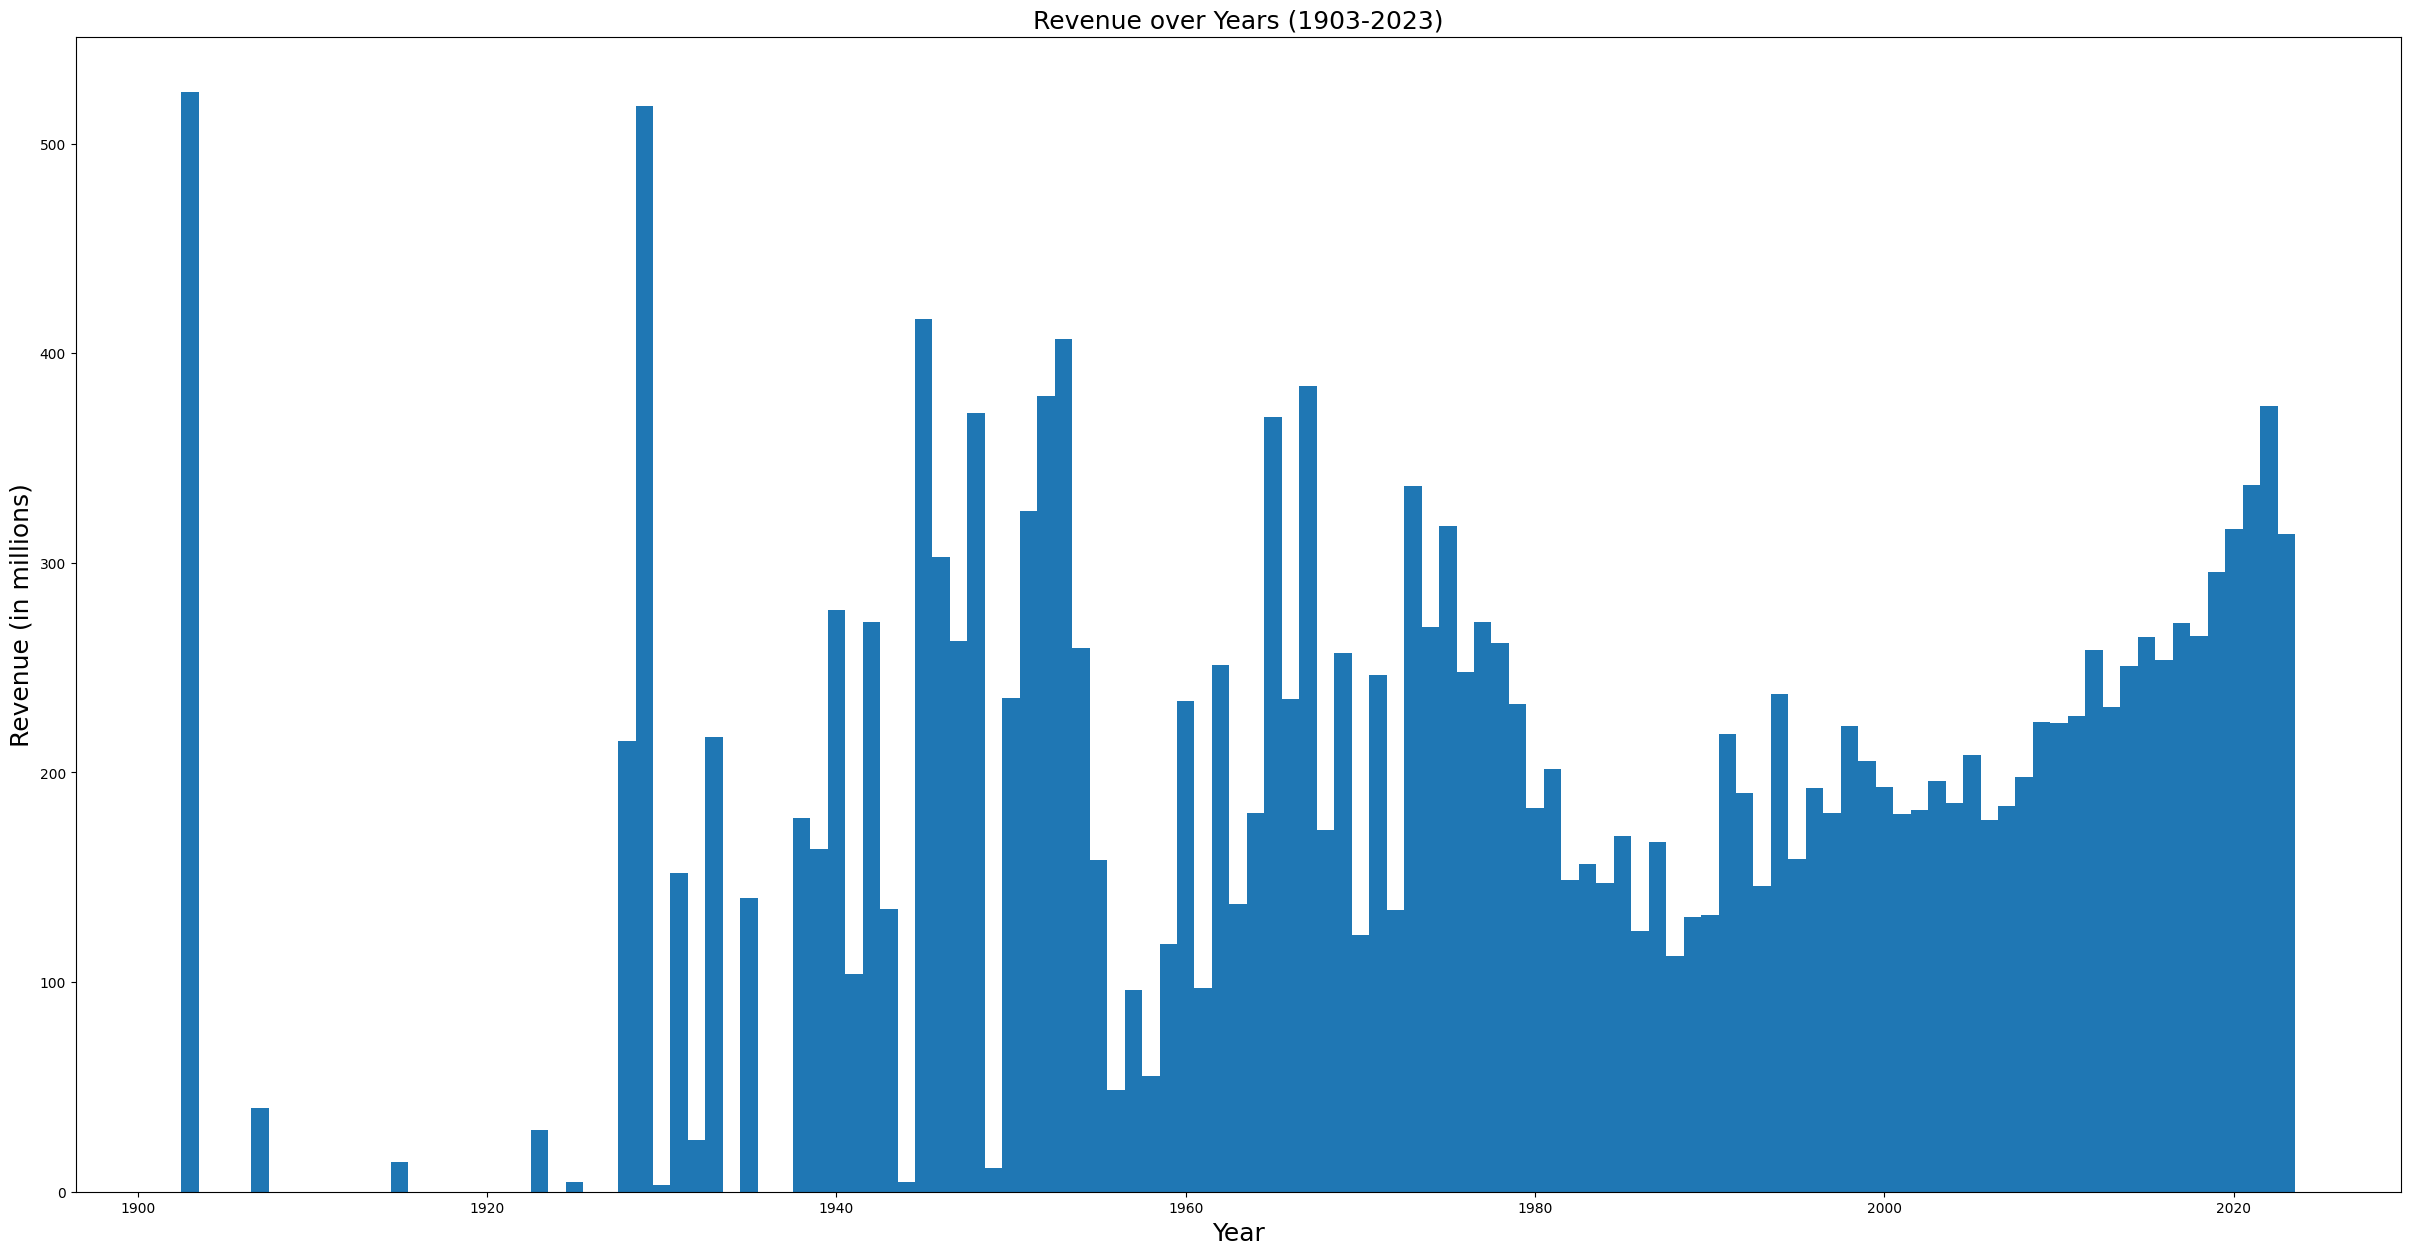

In [71]:
plt.figure(figsize=(30,15))
plt.bar(mean_by_year.index, mean_by_year.revenue/1000000, width=1)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Revenue (in millions)", fontsize=18)
plt.title("Revenue over Years (1903-2023)", fontsize=18)

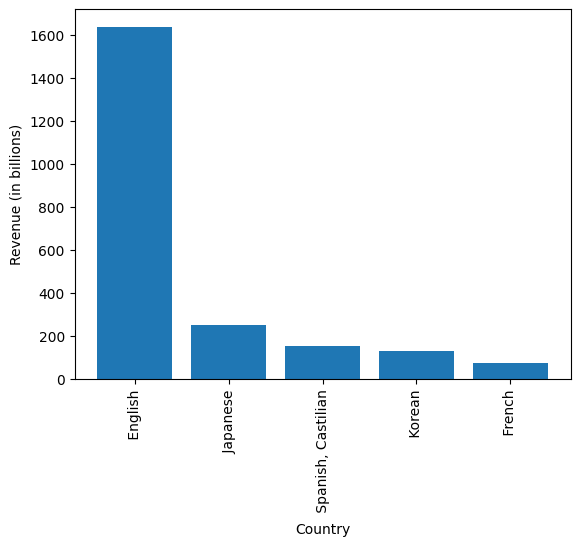

In [68]:
revenue_by_lang = df.loc[:, ['orig_lang', 'revenue']]
revenue_by_lang = revenue_by_lang.groupby('orig_lang').sum()
top_5_langs = revenue_by_lang.nlargest(5, 'revenue')

# Create a bar plot
plt.bar(top_5_langs.index, top_5_langs['revenue']/1000000000)

# Set the x-axis labels
plt.xticks(rotation=90)

# Label the axes
plt.xlabel('Country')
plt.ylabel('Revenue (in billions)')

# Show the plot
plt.show()